In [327]:
import pandas as pd
from utils import *

import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pytrends.request import TrendReq
import requests
import numpy as np
from sklearn.linear_model import LinearRegression
from scipy import stats

In [ ]:
@everyone die Tabelle data/new.csv enthält die Daten bisher (ich muss noch die neuen Faktoren hinzufügen, aber ein paar sind schon drin). 
Könntet ihr ein paar Plots zur Verteilung der Daten machen?
Die Spalten GINI_HND,I_IUSNET,F10_RT sind die Faktoren. Alle anderen Spalten sind die verschiedenen Verbrechen, jeweils in absolut und normiert. Ich würde die normierten nehemen, die Spalten haben jeweils die Endung _P_HTHAB, also z.B. ICCS05021_P_HTHAB.
Intentional homicide könnte interessant sein, das wäre crime code ICCS0101

ICCS0101    Mord 
ICCS0102:   versuchter Mord

ICCS020111: Schwere Körperverletzung 

ICCS020221: Entführung

ICCS0301:   Sexuelle Gewalt 
ICCS03011:  Vergewaltigung 
ICCS03012:  Sexuelle Übergriffe
ICCS0302:   Sexuelle Ausbeutung 

ICCS0401:   Raub 

ICCS0501:   Einbruch
ICCS05012:  Einbruch in private Wohnräume 

ICCS0502:   Diebstahl
ICCS05021:  Diebstahl eines motorisierten Fahrzeugs oder Teilen davon

ICCS0601:   Rechtswidrige Handlungen im Zusammenhang mit kontrollierten Drogen oder Vorläuferstoffen

ICCS0701:   Betrug 
ICCS0703:   Korruption 
ICCS07031:  Bestechung

ICCS07041:  Geldwäsche 
ICCS09051:  Beteiligung an einer organisierten kriminellen Vereinigung

ICCS0903:   Handlungen gegen Computersysteme


dfcrime = pd.read_csv("Crimes_per_100tsd_estat_crim_off_cat_en.csv")
dfalc = pd.read_csv("../raw_data/Death_to_alcoholic_abuse_tps00140_linear.csv")
dfgini = pd.read_csv("../raw_data/Gini_index_tessi190_linear.csv")
 = pd.read_csv("../raw_data/Healthy_life_years_by_sex_hlth_hlye_linear.csv")
 = pd.read_csv("../raw_data/Healthy_life_years_hlth_hlye_linear.csv")
 = pd.read_csv("../raw_data/Participation_in_social_networks_testat_tin00127_en.csv")
 = pd.read_csv("../raw_data/People_risk_poverty_or_social_exclusion_sdg_01_10_linear.csv")
 = pd.read_csv("../raw_data/Unemployment_rate_tipsun20_linear.csv")

GoogleDF = pd.read_csv("geoMap.csv", skiprows=3, \
                       names=["Country", "G2013", "G2015"]) 

GoogleDF.dropna(axis = 0, how = 'any', inplace = True)

GoogleDF['G2013'] = GoogleDF['G2013'].str.replace('\%','',regex=True).astype(int)

GoogleDF['G2015'] = GoogleDF['G2015'].str.replace('\%','',regex=True).astype(int)

GoogleDF.head()

tablelist = [\
           #('dfcrime','dfcrime',"Crimes_per_100tsd_estat_crim_off_cat_en.csv"),
           ('dfalc','d_alc',"../raw_data/Death_to_alcoholic_abuse_tps00140_linear.csv",'mean'), \
           ('dfgini','gini',"../raw_data/Gini_index_tessi190_linear.csv",'mean'), \
        ('dfgini','wealth',"../raw_data/Income_Consumption_Wealth_icw_res_01_linear.csv",'mean'), \ 
           #('dfhage','h_age',"../raw_data/Healthy_life_years_by_sex_hlth_hlye_linear.csv"), \
           ('dfhealthage','h_age',"../raw_data/Healthy_life_years_hlth_hlye_linear.csv",'mean'), \
           ('dfsocnet','socnet',"../raw_data/Participation_in_social_networks_testat_tin00127_en.csv",'mean'), \ 
        ('dfinet','inet',"../raw_data/ICT_Usage_isoc_ci_ac_i_linear.csv",'mean'), \
           ('dfpoverty','poverty',"../raw_data/People_risk_poverty_or_social_exclusion_sdg_01_10_linear.csv",'mean'), \
           ('dfunemp','unemp',"../raw_data/Unemployment_rate_tipsun20_linear.csv",'mean'),\
        ('dfcrimet','crimet',"../raw_data/Crime_in_Metropoles_estat_met_crim_gen_en.csv",'mean')]

In [301]:
dfgini = pd.read_csv("../raw_data/Income_Consumption_Wealth_icw_res_01_linear.csv")
#dfgini = pd.read_csv("../raw_data/ICT_Usage_isoc_ci_ac_i_linear.csv")
#dfgini = pd.read_csv("../raw_data/Crime_in_Metropoles_estat_met_crim_gen_en.csv")
dfgini[['geo', 'geo_d']] = dfgini['geo'].str.split(':', expand=True)
#dfgini = dfgini[dfgini['indic_il'].str.startswith('WLTH_NET')]
#dfgini = dfgini[dfgini['quant_wlth'].str.startswith('TOTAL')]
dfgini = dfgini[dfgini['geo'].str.startswith('AT')]
dfgini = dfgini.loc[dfgini['TIME_PERIOD'] > 2015]
#dfgini = dfgini.loc[dfgini ['TIME_PERIOD'] == '2010']
dfgini.dropna(subset=['OBS_VALUE'], inplace=True)
dfgini

,DATAFLOW,LAST UPDATE,freq,quant_inc,quant_expn,quant_wlth,indic_il,unit,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG,geo_d
2,ESTAT:ICW_RES_01(1.0),28/11/23 23:00:00,A:Annual,D1:First decile,D1:First decile,D1:First decile,EXPN_CONS:Consumption expenditure,PC:Percentage,AT,2020,0.3,s,Austria
54,ESTAT:ICW_RES_01(1.0),28/11/23 23:00:00,A:Annual,D1:First decile,D1:First decile,D1:First decile,HH:Household,PC:Percentage,AT,2020,1.0,s,Austria
106,ESTAT:ICW_RES_01(1.0),28/11/23 23:00:00,A:Annual,D1:First decile,D1:First decile,D1:First decile,INC_DISP:Disposable income,PC:Percentage,AT,2020,0.3,s,Austria
158,ESTAT:ICW_RES_01(1.0),28/11/23 23:00:00,A:Annual,D1:First decile,D1:First decile,D1:First decile,WLTH_NET:Net wealth,PC:Percentage,AT,2020,0.0,s,Austria
210,ESTAT:ICW_RES_01(1.0),28/11/23 23:00:00,A:Annual,D1:First decile,D1:First decile,D10:Tenth decile,EXPN_CONS:Consumption expenditure,PC:Percentage,AT,2020,0.0,s,Austria
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110774,ESTAT:ICW_RES_01(1.0),28/11/23 23:00:00,A:Annual,TOTAL:Total,TOTAL:Total,QU5:Fifth quintile,WLTH_NET:Net wealth,PC:Percentage,AT,2020,68.1,s,Austria
110826,ESTAT:ICW_RES_01(1.0),28/11/23 23:00:00,A:Annual,TOTAL:Total,TOTAL:Total,TOTAL:Total,EXPN_CONS:Consumption expenditure,PC:Percentage,AT,2020,100.0,s,Austria
110878,ESTAT:ICW_RES_01(1.0),28/11/23 23:00:00,A:Annual,TOTAL:Total,TOTAL:Total,TOTAL:Total,HH:Household,PC:Percentage,AT,2020,100.0,s,Austria
110954,ESTAT:ICW_RES_01(1.0),28/11/23 23:00:00,A:Annual,TOTAL:Total,TOTAL:Total,TOTAL:Total,INC_DISP:Disposable income,PC:Percentage,AT,2020,100.0,s,Austria


In [319]:
dfgini = pd.read_csv("../raw_data/ICT_Usage_estat_isoc_ci_ac_i_en.csv")
#dfgini = pd.read_csv("../raw_data/ICT_Usage_isoc_ci_ac_i_linear.csv")
#dfgini = pd.read_csv("../raw_data/Crime_in_Metropoles_estat_met_crim_gen_en.csv")
#dfgini[['geo', 'geo_d']] = dfgini['geo'].str.split(':', expand=True)
dfgini = dfgini[dfgini['unit'].str.startswith('PC_IND_IU3')]
dfgini = dfgini[dfgini['indic_is'].str.startswith('I_IUBK')]
dfgini = dfgini[dfgini['geo'].str.startswith('AT')]
dfgini = dfgini[dfgini['ind_type'].str.startswith('Y')]
#dfgini = dfgini.loc[dfgini['TIME_PERIOD'] > 2015]
dfgini = dfgini.loc[dfgini['TIME_PERIOD'] == 2015 ]
#dfgini.dropna(subset=['OBS_VALUE'], inplace=True)
dfgini

#dfgini['unit'].unique() PC_IND_IU3

,DATAFLOW,LAST UPDATE,freq,indic_is,unit,ind_type,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
236366,ESTAT:ISOC_CI_AC_I(1.0),15/12/23 11:00:00,A:Annual,I_IUBK:Internet use: Internet banking,PC_IND_IU3:Percentage of individuals who used ...,"Y16_19:Individuals, 16 to 19 years old",AT:Austria,2015,42.07,NaN
236857,ESTAT:ISOC_CI_AC_I(1.0),15/12/23 11:00:00,A:Annual,I_IUBK:Internet use: Internet banking,PC_IND_IU3:Percentage of individuals who used ...,"Y16_24:Individuals, 16 to 24 years old",AT:Austria,2015,57.60,NaN
237606,ESTAT:ISOC_CI_AC_I(1.0),15/12/23 11:00:00,A:Annual,I_IUBK:Internet use: Internet banking,PC_IND_IU3:Percentage of individuals who used ...,Y16_24HI:Individuals aged 16-24 with high form...,AT:Austria,2015,77.06,NaN
238331,ESTAT:ISOC_CI_AC_I(1.0),15/12/23 11:00:00,A:Annual,I_IUBK:Internet use: Internet banking,PC_IND_IU3:Percentage of individuals who used ...,Y16_24LO:Individuals aged 16-24 with low educa...,AT:Austria,2015,32.07,NaN
239059,ESTAT:ISOC_CI_AC_I(1.0),15/12/23 11:00:00,A:Annual,I_IUBK:Internet use: Internet banking,PC_IND_IU3:Percentage of individuals who used ...,Y16_24ME:Individuals aged 16-24 with medium fo...,AT:Austria,2015,62.89,NaN
239907,ESTAT:ISOC_CI_AC_I(1.0),15/12/23 11:00:00,A:Annual,I_IUBK:Internet use: Internet banking,PC_IND_IU3:Percentage of individuals who used ...,"Y16_29:Individuals, 16 to 29 years old",AT:Austria,2015,63.39,NaN
240395,ESTAT:ISOC_CI_AC_I(1.0),15/12/23 11:00:00,A:Annual,I_IUBK:Internet use: Internet banking,PC_IND_IU3:Percentage of individuals who used ...,Y16_29HI:Individuals aged 16-29 with high form...,AT:Austria,2015,81.97,NaN
240883,ESTAT:ISOC_CI_AC_I(1.0),15/12/23 11:00:00,A:Annual,I_IUBK:Internet use: Internet banking,PC_IND_IU3:Percentage of individuals who used ...,Y16_29LO:Individuals aged 16-29 with low forma...,AT:Austria,2015,34.45,NaN
241369,ESTAT:ISOC_CI_AC_I(1.0),15/12/23 11:00:00,A:Annual,I_IUBK:Internet use: Internet banking,PC_IND_IU3:Percentage of individuals who used ...,Y16_29ME:Individuals aged 16-29 with medium fo...,AT:Austria,2015,61.81,NaN
241857,ESTAT:ISOC_CI_AC_I(1.0),15/12/23 11:00:00,A:Annual,I_IUBK:Internet use: Internet banking,PC_IND_IU3:Percentage of individuals who used ...,"Y20_24:Individuals, 20 to 24 years old",AT:Austria,2015,68.01,NaN


In [386]:
dfgini = pd.read_csv("../raw_data/Crime_in_Metropoles_estat_met_crim_gen_en.csv")
#dfgini = pd.read_csv("../raw_data/ICT_Usage_isoc_ci_ac_i_linear.csv")
#dfgini = pd.read_csv("../raw_data/Crime_in_Metropoles_estat_met_crim_gen_en.csv")
#dfgini[['geo', 'geo_d']] = dfgini['geo'].str.split(':', expand=True)
dfgini = dfgini[dfgini['metroreg'].str.startswith('DE')]
dfgini = dfgini[dfgini['iccs'].str.startswith('ICCS050211')]
#dfgini = dfgini.loc[dfgini['TIME_PERIOD'] > 2015]
    #dfgini = dfgini.loc[dfgini['TIME_PERIOD'] == 2015 ]
#dfgini.dropna(subset=['OBS_VALUE'], inplace=True)
dfgini
print(dfgini['metroreg'].unique())

['DE:Germany (until 1990 former territory of the FRG)' 'DE001MC:Berlin'
 'DE002M:Hamburg' 'DE003M:München' 'DE004M:Köln'
 'DE005M:Frankfurt am Main' 'DE007M:Stuttgart' 'DE008M:Leipzig'
 'DE009M:Dresden' 'DE011M:Düsseldorf' 'DE012M:Bremen' 'DE013M:Hannover'
 'DE014M:Nürnberg' 'DE017M:Bielefeld' 'DE018M:Halle an der Saale'
 'DE019M:Magdeburg' 'DE020M:Wiesbaden' 'DE021M:Göttingen'
 'DE025M:Darmstadt' 'DE027M:Freiburg im Breisgau' 'DE028M:Regensburg'
 'DE031M:Schwerin' 'DE032M:Erfurt' 'DE033M:Augsburg' 'DE034M:Bonn'
 'DE035M:Karlsruhe' 'DE036M:Mönchengladbach' 'DE037M:Mainz'
 'DE038M:Ruhrgebiet' 'DE039M:Kiel' 'DE040M:Saarbrücken' 'DE042M:Koblenz'
 'DE043M:Rostock' 'DE044M:Kaiserslautern' 'DE045M:Iserlohn'
 'DE052M:Flensburg' 'DE054M:Konstanz' 'DE057M:Gießen' 'DE059M:Bayreuth'
 'DE061M:Aschaffenburg' 'DE064M:Neubrandenburg' 'DE069M:Rosenheim'
 'DE073M:Offenburg' 'DE074M:Görlitz' 'DE077M:Schweinfurt' 'DE079M:Wetzlar'
 'DE083M:Braunschweig-Salzgitter-Wolfsburg' 'DE084M:Mannheim-Ludwigshafen'


In [217]:
def normalize(df, column_name='geo'):
    delimiter = ":"
    new_column_names = [column_name, column_name + '_d']
    df[new_column_names] = df[column_name].str.split(delimiter, expand=True)
    
    #df.dropna(subset=['OBS_VALUE'], inplace=True)
    return df

def grouping(df, rename='value', agg='mean'):
    #df.dropna(subset=['OBS_VALUE'], inplace=True)
    df = df.groupby(['geo', 'TIME_PERIOD']).agg({'OBS_VALUE': agg})#, 'geo_d': 'max'})
    df.rename(columns={'TIME_PERIOD': 'year'}, inplace=True)
    df.rename(columns={'OBS_VALUE': rename}, inplace=True)
    return df

In [281]:
tablelist = [\
           #('dfcrime','dfcrime',"Crimes_per_100tsd_estat_crim_off_cat_en.csv"),
           ('dfalc','d_alc',"../raw_data/Death_to_alcoholic_abuse_tps00140_linear.csv",'mean'), \
           ('dfgini','gini',"../raw_data/Gini_index_tessi190_linear.csv",'mean'), \
        ('dfgini','wealth',"../raw_data/Income_Consumption_Wealth_icw_res_01_linear.csv",'mean'), \ 
           #('dfhage','h_age',"../raw_data/Healthy_life_years_by_sex_hlth_hlye_linear.csv"), \
           ('dfhealthage','h_age',"../raw_data/Healthy_life_years_hlth_hlye_linear.csv",'mean'), \
           ('dfsocnet','socnet',"../raw_data/Participation_in_social_networks_testat_tin00127_en.csv",'mean'), \ 
        ('dfinet','inet',"../raw_data/ICT_Usage_estat_isoc_ci_ac_i_en.csv",'mean'), \
           ('dfpoverty','poverty',"../raw_data/People_risk_poverty_or_social_exclusion_sdg_01_10_linear.csv",'mean'), \
           ('dfunemp','unemp',"../raw_data/Unemployment_rate_tipsun20_linear.csv",'mean'),\
        ('dfcrimet','crimet',"../raw_data/Crime_in_Metropoles_estat_met_crim_gen_en.csv",'mean')]

#Nachschauen worauf sich d_alc der Wert bezieht!!!!
## Wie wird poverty das gemessen?????
for dataframe, name, value, agg in tablelist:
    exec(f"{dataframe} = pd.read_csv('{value}')")
    #exec(f"print('{dataframe}', len({dataframe}) )")   
    #exec(f"print({dataframe})")

dfalc  = dfalc.loc[dfalc ['sex'] == 'T:Total']
dfhealthage = dfhealthage.loc[dfhealthage ['sex'] == 'T:Total']
dfhealthage = dfhealthage[dfhealthage['indic_he'].str.startswith('HLY_PC_0')]
dfpoverty   = dfpoverty[dfpoverty['age'].str.startswith('TOTAL:Total')]
dfpoverty   = dfpoverty[dfpoverty['unit'].str.startswith('PC:Percentage')]                      
dfunemp     = dfunemp[dfunemp['unit'].str.startswith('PC_ACT')]     
dfunemp     = dfunemp[dfunemp['age'].str.startswith('Y25-74')]

#for dataframe, name, value, agg in tablelist:
#    exec(f"print('{dataframe}', len({dataframe}) )")   

dfall = dfalc
dfall = dfall.reset_index()
dfall.drop(columns=dfall.columns.difference(['geo', 'TIME_PERIOD']), axis=1, inplace=True)
#print(dfall)

for dataframe, name, value, agg in tablelist:
    exec(f"{dataframe} = grouping({dataframe}, '{name}', '{agg}')")
    exec(f"dfall = pd.merge(dfall, {dataframe}, on=['geo', 'TIME_PERIOD'], how='outer')")

dfcrime = pd.read_csv("../raw_data/Crimes_per_100tsd_estat_crim_off_cat_en.csv")
dfcrime.rename(columns={'OBS_VALUE': 'Nr_Crimes'}, inplace=True)
dfcrime = dfcrime[dfcrime['unit'].str.startswith('P_HTHAB')]
#dfcrime = dfcrime[dfcrime['iccs'].str.startswith('ICCS0101')\
                  #|dfcrime['iccs'].str.startswith('ICCS03')\
#                 ]
#dfcrime = dfcrime.groupby(['geo', 'TIME_PERIOD'])['Nr_Crimes'].sum()
dfcrime = dfcrime.groupby(['geo', 'TIME_PERIOD', 'iccs'])['Nr_Crimes'].sum()
dfcrime = dfcrime.reset_index()
dfcrime = normalize(dfcrime)
dfcrime.drop('geo_d', axis=1, inplace=True)
dfcrime = normalize(dfcrime,'iccs')

dfall = normalize(dfall)
dfall = pd.merge(dfall, dfcrime, on=['geo', 'TIME_PERIOD'], how='inner')
dfall.to_csv('../data/df_all.csv', index=False)

print(dfall)

#print(dfcrime['iccs'].unique())

     geo  TIME_PERIOD  d_alc  gini  h_age  socnet  poverty  unemp    geo_d  \
0     AL         2011    0.0   NaN    NaN     NaN      NaN    NaN  Albania   
1     AL         2011    0.0   NaN    NaN     NaN      NaN    NaN  Albania   
2     AL         2011    0.0   NaN    NaN     NaN      NaN    NaN  Albania   
3     AL         2011    0.0   NaN    NaN     NaN      NaN    NaN  Albania   
4     AL         2011    0.0   NaN    NaN     NaN      NaN    NaN  Albania   
...   ..          ...    ...   ...    ...     ...      ...    ...      ...   
7008  IT         2010    NaN   NaN    NaN     NaN      NaN    7.1    Italy   
7009  IT         2010    NaN   NaN    NaN     NaN      NaN    7.1    Italy   
7010  IT         2010    NaN   NaN    NaN     NaN      NaN    7.1    Italy   
7011  IT         2010    NaN   NaN    NaN     NaN      NaN    7.1    Italy   
7012  IT         2010    NaN   NaN    NaN     NaN      NaN    7.1    Italy   

            iccs  Nr_Crimes                                    

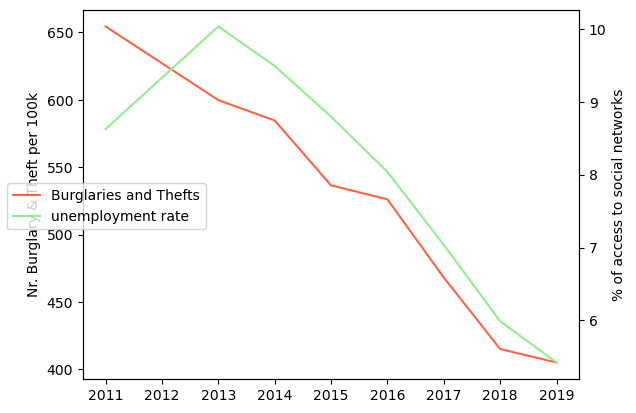

[-0.0799169] 95.07472647377455


In [384]:
dfout = dfall
dfout.dropna(subset=['socnet'], inplace=True)
dfout.dropna(subset=['Nr_Crimes'], inplace=True)
#dfout.dropna(subset=['gini'], inplace=True)
dfout = dfout.loc[dfout['TIME_PERIOD'] < 2020]
dfout = dfout[dfout['iccs'].str.startswith('ICCS05')\
                  #|dfout['iccs'].str.startswith('ICCS03')\
                 ]
#dfout = dfout.groupby(['geo', 'TIME_PERIOD'])[['Nr_Crimes'],['gini']].sum()
dfout = dfout.groupby([#'geo', 
                       'TIME_PERIOD' 
                       #, 'iccs' , 'iccs_d'
                        ]).agg({  'Nr_Crimes': 'mean'#})
                                            , 'gini'     : 'mean'
                                            , 'socnet'   : 'mean'
                                            , 'unemp'   : 'mean'
                                            })
dfout = dfout.reset_index()
#df_austria = dfcrime_alc[dfcrime_alc['geo'] == 'AT']
#dfout1 = dfout[dfout['iccs'] == 'ICCS05021']
#dfout2 = dfout[dfout['iccs'] == 'ICCS05012']
#dfout3 = dfout[dfout['iccs'] == 'ICCS0502']
#dfout4 = dfout[dfout['iccs'] == 'ICCS0501']

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(dfout['TIME_PERIOD'], dfout['Nr_Crimes'], color='tomato', label='Burglaries and Thefts')
#ax1.plot(dfout1['TIME_PERIOD'], dfout1['Nr_Crimes'], color='tomato', label=max(dfout1['iccs_d']))
#ax1.plot(dfout2['TIME_PERIOD'], dfout2['Nr_Crimes'], color='paleturquoise', label=max(dfout2['iccs_d']))
#ax1.plot(dfout3['TIME_PERIOD'], dfout3['Nr_Crimes'], color='moccasin', label=max(dfout3['iccs_d']))
#ax1.plot(dfout4['TIME_PERIOD'], dfout4['Nr_Crimes'], color='deepskyblue', label=max(dfout4['iccs_d']))
#plt.plot(df[df['name'] == 'John']['age'], label='John')
#ax2.plot(dfout['TIME_PERIOD'], dfout['socnet'], color='lightgreen', label='% attending social networks')
ax2.plot(dfout['TIME_PERIOD'], dfout['unemp'], color='lightgreen', label='unemployment rate')
#ax2.scatter(dfout['TIME_PERIOD'], dfout['gini'], color='darkgoldenrod', label='Gini-Index')

#ax1.set_title('Scatter Plot with Two Lines')
#ax1.set_xlabel('X-axis')
ax1.set_ylabel('Nr. Burglary & Theft per 100k')
ax2.set_ylabel('% of access to social networks')

plt.title('')
#plt.ylabel('GDP per capita')
fig.legend(loc=6)
plt.show()


model = LinearRegression().fit(dfout[["Nr_Crimes"]],dfout["socnet"]) # Enter the data for the linear regression model
print(model.coef_, model.intercept_)

#ICCS0903
#die Tabelle data/new.csv enthält die Daten bisher (ich muss noch die neuen Faktoren hinzufügen, aber ein paar sind schon drin). 
#Könntet ihr ein paar Plots zur Verteilung der Daten machen?
#Die Spalten GINI_HND,I_IUSNET,F10_RT sind die Faktoren. Alle anderen Spalten sind die verschiedenen Verbrechen, jeweils in absolut und normiert. Ich würde die normierten nehemen, die Spalten haben jeweils die Endung _P_HTHAB, also z.B. ICCS05021_P_HTHAB.
#Intentional homicide könnte interessant sein, das wäre crime code ICCS0101. 


In [376]:
print(model.coef_, model.intercept_) 
print(model.get_params())
prediction = model.predict(dfout[["Nr_Crimes"]]) # Predict the social impact
residual = dfout["socnet"] - prediction # Calculate the residual
print(np.var(residual))
print(np.var(dfout["socnet"]))
print(1 - np.var(residual) / np.var(dfout["socnet"])) 

[-0.0799169] 95.07472647377455
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}
2.230807350732441
46.74089315411503
0.9522728985221361


In [367]:
pearson_soc_burglary = stats.pearsonr(dfout['Nr_Crimes'],dfout['socnet'])
print(pearson_soc_burglary)

PearsonRResult(statistic=-0.9758447102496052, pvalue=3.459994823069384e-05)


In [368]:
print(f"Burglary/Theft vs access to soc. networks: {stats.ttest_ind(dfout['Nr_Crimes'],dfout['socnet'])}")

Burglary/Theft vs access to soc. networks: TtestResult(statistic=14.861435581778561, pvalue=5.754011005638378e-10, df=14.0)


95% conf. interval: [-0.07516574 -0.06800023]
standard error: 1.8217608955600675e-05


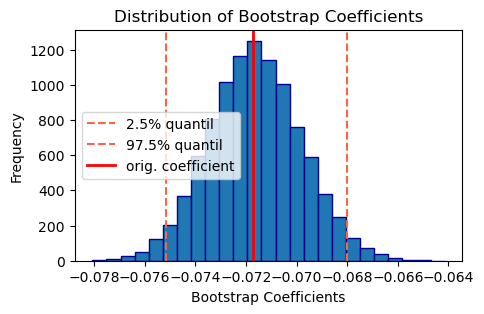

In [330]:
# Your Code goes here!
multi_sample_bs_model_coef = []
for i in range(10000):
    # resample the data
    sampled_users = dfout.sample(100, replace=True)
    # fit the model
    multi_sample_bs_model = LinearRegression()
    multi_sample_bs_model.fit(sampled_users[["Nr_Crimes"]], sampled_users["socnet"])
    # append the coefficient to the multi_sample_bs_model_coef list
    multi_sample_bs_model_coef.append(multi_sample_bs_model.coef_[0])
multi_sample_bs_model_coef = np.array(multi_sample_bs_model_coef) # Convert to array for simpler use later

confidence_interval = np.percentile(multi_sample_bs_model_coef, [2.5, 97.5])
print("95% conf. interval:", confidence_interval)

standard_error = np.std(multi_sample_bs_model_coef) / np.sqrt(len(multi_sample_bs_model_coef))
print("standard error:", standard_error)

fig, ax = plt.subplots(1, 1,  figsize=(5,3))
ax.hist(multi_sample_bs_model_coef, bins=25, edgecolor='darkblue') 
ax.set_title("Distribution of Bootstrap Coefficients")
ax.set_xlabel("Bootstrap Coefficients")
ax.set_ylabel("Frequency")

ax.axvline(confidence_interval[0], color="tomato", linestyle='dashed', label='2.5% quantil')
ax.axvline(confidence_interval[1], color="tomato", linestyle='dashed', label='97.5% quantil')
ax.axvline(model.coef_, color="red", linewidth=2, label='orig. coefficient')
ax.legend(loc=6)

     geo  TIME_PERIOD  d_alc  gini  h_age  socnet  poverty  unemp     geo_d  \
95    AL         2018   0.00  35.4    NaN   48.33     53.9    NaN   Albania   
114   AL         2019   0.00  34.3    NaN   52.13     50.7    NaN   Albania   
133   AL         2020   0.00  33.2    NaN   54.80     46.2    NaN   Albania   
218   AT         2016   5.70  27.2   69.7   49.02     17.2    5.7   Austria   
238   AT         2017   5.63  27.9   69.9   51.19     17.1    5.3   Austria   
...   ..          ...    ...   ...    ...     ...      ...    ...       ...   
5723  RO         2021    NaN  34.3   79.4   68.55     34.4    4.5   Romania   
5756  SE         2021    NaN  26.8   82.3   71.51     17.2    6.8    Sweden   
5772  SI         2021    NaN  23.0   81.0   63.61     13.2    4.2  Slovenia   
5789  SK         2021    NaN  21.8   76.1   64.58     15.6    6.1  Slovakia   
6928  XK         2017    NaN   NaN    NaN   56.50      NaN    NaN   Kosovo*   

          iccs  Nr_Crimes                         i

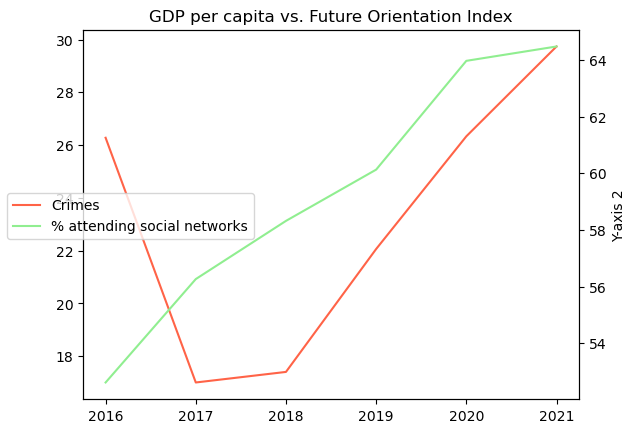

NameError: name 'LinearRegression' is not defined

In [277]:
dfout = dfall
dfout.dropna(subset=['socnet'], inplace=True)
dfout.dropna(subset=['Nr_Crimes'], inplace=True)
#dfout.dropna(subset=['gini'], inplace=True)

dfout = dfout[dfout['iccs'].str.startswith('ICCS0903')\
                  #|dfout['iccs'].str.startswith('ICCS03')\
                 ]
#dfout = dfout.groupby(['geo', 'TIME_PERIOD'])[['Nr_Crimes'],['gini']].sum()

print(dfout)

dfout = dfout.groupby([#'geo', 
                       'TIME_PERIOD']).agg({  'Nr_Crimes': 'mean'#})
                                            , 'gini'     : 'mean'
                                            , 'socnet'   : 'mean'
                                            })
dfout = dfout.reset_index()
#df_austria = dfcrime_alc[dfcrime_alc['geo'] == 'AT']

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(dfout['TIME_PERIOD'], dfout['Nr_Crimes'], color='tomato', label='Crimes')
ax2.plot(dfout['TIME_PERIOD'], dfout['socnet'], color='lightgreen', label='% attending social networks')
#ax2.scatter(dfout['TIME_PERIOD'], dfout['gini'], color='darkgoldenrod', label='Gini-Index')

#ax1.set_title('Scatter Plot with Two Lines')
#ax1.set_xlabel('X-axis')
#ax1.set_ylabel('Y-axis 1')
ax2.set_ylabel('Y-axis 2')

plt.title('GDP per capita vs. Future Orientation Index')
#plt.ylabel('GDP per capita')
fig.legend(loc=6)
plt.show()


model = LinearRegression().fit(dfout[["Nr_Crimes"]],dfout["socnet"]) # Enter the data for the linear regression model
print(model.coef_, model.intercept_)

#

In [ ]:
plt.scatter(dfcrime_alc['OBS_VALUE_x'],wholeDf['OBS_VALUE_y']) # Enter the needed data to plot the scatter plot
import pandas as pd
import matplotlib.pyplot as plt

# create a sample DataFrame
df = pd.DataFrame({'x': [1, 2, 3, 4, 5], 'y1': [2, 4, 6, 8, 10], 'y2': [1, 3, 5, 7, 9]})

# plot the scatter plot with two lines

ax1.scatter(df['x'], df['y1'], color='red', label='Line 1')
ax2.scatter(df['x'], df['y2'], color='blue', label='Line 2')

# set the title and labels
ax1.set_title('Scatter Plot with Two Lines')
ax1.set_xlabel('X-axis')
ax1.set_ylabel('Y-axis 1')
ax2.set_ylabel('Y-axis 2')

# create a second x-axis for years
ax3 = ax1.twiny()
ax3.set_xticks([1, 2, 3, 4, 5])
ax3.set_xticklabels(['2017', '2018', '2019', '2020', '2021'])
ax3.set_xlabel('Year')

# show the plot
plt.show()


plt.title('GDP per capita vs. Future Orientation Index')
plt.xlabel('Future Orientation Index')
plt.ylabel('GDP per capita')
plt.show()

if not os.path.exists("plots"):
    os.makedirs("plots")

crimeDF = pd.read_csv("data/crime.csv")
for column in ["iccs", "freq", "unit", "geo"]:
    crimeDF = split_column(crimeDF, column)

# load income Gini
giniDF = pd.read_csv("data/income_gini.csv")
for column in ["indic_il", "freq", "geo"]:
    giniDF = split_column(giniDF, column)
socNetPartDF = pd.read_csv("data/social_network_participation.csv")
for column in ["indic_is", "ind_type", "freq", "unit", "geo"]:
    socNetPartDF = split_column(socNetPartDF, column)

crime2019DF = data_from_year(crimeDF, 2019)
gini2019DF = data_from_year(giniDF, 2019)
socNetPart2019DF = data_from_year(socNetPartDF, 2019)

allDF = pd.DataFrame()

# create columns for each crime
crimes = {}
for crime, crime_rows in crime2019DF.groupby(by="iccs_code"):
    tmp = pd.pivot(data=crime_rows, index="geo_code", columns="unit_code", values="OBS_VALUE")
    # tmp.rename(columns={"NR": ""})
    allDF = pd.concat([allDF, tmp.add_prefix(f"{crime}_")], axis=1)
    crimes.update({crime: crime_rows["iccs_name"].unique()[0]})

# append columns of the factors
tmp = pd.pivot(data=gini2019DF, index="geo_code", columns="indic_il_code", values="OBS_VALUE")
allDF = pd.merge(allDF, tmp, left_index=True, right_index=True)
tmp = pd.pivot(data=socNetPart2019DF, index="geo_code", columns="indic_is_name", values="OBS_VALUE")
tmp["internet_use"] = tmp["Internet use"]
allDF = pd.merge(allDF, tmp, left_index=True, right_index=True)
print(".")


# Linear regression
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
# train = X_train.join(y_train)
# test = X_test.join(y_test)
log = open("data/regression.log", 'w');
for crime_code, crime_name in crimes.items():
    try:
        model = smf.mixedlm(f"{crime_code}_P_HTHAB ~ internet_use + GINI_HND", data=allDF, groups=allDF.index)
        result = model.fit()
        # log.write(result.summary())
        # log.write(result.params)

        sns.regplot(x="GINI_HND", y=f"{crime_code}_P_HTHAB", data=allDF)
        plt.suptitle(crime_name)
        plt.savefig(f"plots/{crime_name}.png")
        plt.show()
    except IndexError:
        print(f"no fit for {crime_code}: \t'{crime_name}'")
        log.write(f"no fit for {crime_code}:\t'{crime_name}'\n")
log.close()